In [1]:
# %whos
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [2]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

In [4]:
data = pd.read_csv('NYCPoverty2017.csv')

In [5]:
#Replace missing values with 0
data = data.fillna(0)

In [6]:
data.NYCgov_Pov_Stat.value_counts()

2    55985
1    12109
Name: NYCgov_Pov_Stat, dtype: int64

In [7]:
# changing PovStatus values from 1 and 2 to 0 and 1
data['NYCgov_Pov_Stat'].replace([1,2],[0,1], inplace=True)

In [8]:
# confirm
data.NYCgov_Pov_Stat.value_counts()

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64

In [9]:
chosen_catcols = ['CIT','SEX','ESR','DIS','Ethnicity','Boro']

In [10]:
data[chosen_catcols] = data[chosen_catcols].astype(np.str)

In [11]:
chosen_cols6 = ['TotalWorkHrs_PU', 'NYCgov_Income','NYCgov_Threshold','ENG', \
                'AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', \
                'EducAttain', 'NYCgov_Housing', 'NYCgov_PovGapIndex']

In [12]:
chosen_cols7 = ['ENG', 'AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', \
                'EducAttain', 'NYCgov_Housing', 'NYCgov_PovGapIndex']

In [13]:
data.columns

Index(['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH',
       'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW',
       'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'Boro', 'Povunit_ID',
       'Povunit_Rel', 'HIUnit_ID', 'HIUnit_Head', 'SNAPUnit_ID',
       'SNAPUnit_Rel', 'TaxUnit_ID', 'TaxUnit_Rel', 'TaxUnit_FILER',
       'TaxUnit_FILESTAT', 'TaxUnit_FILETYPE', 'NYCgov_REL', 'NYCgov_SFN',
       'NYCgov_SFR', 'FamType_PU', 'HousingStatus', 'Ethnicity',
       'TotalWorkHrs_PU', 'EducAttain', 'CitizenStatus', 'AgeCateg',
       'FTPTWork', 'PreTaxIncome_PU', 'WAGP_adj', 'INTP_adj', 'SEMP_adj',
       'SSP_adj', 'SSIP_adj', 'PA_adj', 'RETP_adj', 'OI_adj', 'MRGP_adj',
       'RNTP_adj', 'NYCgov_Housing', 'NYCgov_Childcare', 'NYCgov_Commuting',
       'NYCgov_MOOP', 'NYCgov_MedSpending', 'NYCgov_MedPremiums',
       'NYCgov_HEAP', 'NYCgov_WIC', 'NYCgov_SNAP', 'NYCgov_SchoolLunch',
       'NYCgov_SchoolBreakfast', 'NYCgov_Nutrition', 'NYCgov_FICAtax',
 

In [307]:
chosen_cols8 = ['ENG', 'AGEP', 'SEX', 'ESR', 'Ethnicity', 'Boro', \
                'EducAttain', 'NYCgov_Housing']

In [14]:
chosen_cols9 = ['ENG', 'AGEP', 'SEX', 'ESR', 'Ethnicity', 'Boro', 
                'EducAttain', 'NYCgov_Housing', 'WAGP_adj', 'INTP_adj', 'SEMP_adj',
                'SSP_adj', 'SSIP_adj', 'PA_adj', 'RETP_adj', 'OI_adj', 'MRGP_adj',
                'RNTP_adj']

In [15]:
X = pd.get_dummies(data[chosen_cols9], drop_first=True, dtype=float)
print(len(X.columns), X.columns)

28 Index(['ENG', 'AGEP', 'EducAttain', 'NYCgov_Housing', 'WAGP_adj', 'INTP_adj',
       'SEMP_adj', 'SSP_adj', 'SSIP_adj', 'PA_adj', 'RETP_adj', 'OI_adj',
       'MRGP_adj', 'RNTP_adj', 'SEX_2', 'ESR_1.0', 'ESR_2.0', 'ESR_3.0',
       'ESR_4.0', 'ESR_6.0', 'Ethnicity_2', 'Ethnicity_3', 'Ethnicity_4',
       'Ethnicity_5', 'Boro_2', 'Boro_3', 'Boro_4', 'Boro_5'],
      dtype='object')


In [16]:
feat = X
target = data['NYCgov_Pov_Stat']
print(feat.shape, target.shape)

(68094, 28) (68094,)


In [17]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.25, random_state=123)

In [18]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier()
#Now, train each of the classifiers using the training data.
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [19]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [20]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [21]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.8327002153906403
F1-Score: 0.9043160794678254

Model: Gradient Boosted Trees
Accuracy: 0.8370276091638927
F1-Score: 0.9075704909658289

Testing Metrics
Model: AdaBoost
Accuracy: 0.8365836466165414
F1-Score: 0.9070373588184188

Model: Gradient Boosted Trees
Accuracy: 0.8404017857142857
F1-Score: 0.9097911617251568


In [22]:
# confusion matrix for Adaboost
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[  670,  2288],
       [  494, 13572]])

In [23]:
# confusion matrix for GBboost
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[  606,  2352],
       [  365, 13701]])

In [24]:
# classification report for Adaboost
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

             precision    recall  f1-score   support

          0       0.58      0.23      0.33      2958
          1       0.86      0.96      0.91     14066

avg / total       0.81      0.84      0.81     17024



In [25]:
# classification report for GBboost
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

             precision    recall  f1-score   support

          0       0.62      0.20      0.31      2958
          1       0.85      0.97      0.91     14066

avg / total       0.81      0.84      0.81     17024



In [27]:
scaled_features = StandardScaler().fit_transform(data[chosen_cols9])

In [28]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(cross_val_score(adaboost_clf, scaled_features, target, cv=5).mean())

Mean Adaboost Cross-Val Score (k=5):
0.831394848481865


In [29]:
print('Mean GBT Cross-Val Score (k=5):')
print(cross_val_score(gbt_clf, scaled_features, target, cv=5).mean())
# Expected Output: 0.7591715474068416

Mean GBT Cross-Val Score (k=5):
0.8343760133730218


In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }

# run grid search
grid_search_ABC = tqdm(GridSearchCV(adaboost_clf, param_grid=param_grid, scoring = 'roc_auc'))

In [273]:
tree_clf = DecisionTreeClassifier(criterion = "gini") # max_depth = 5
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

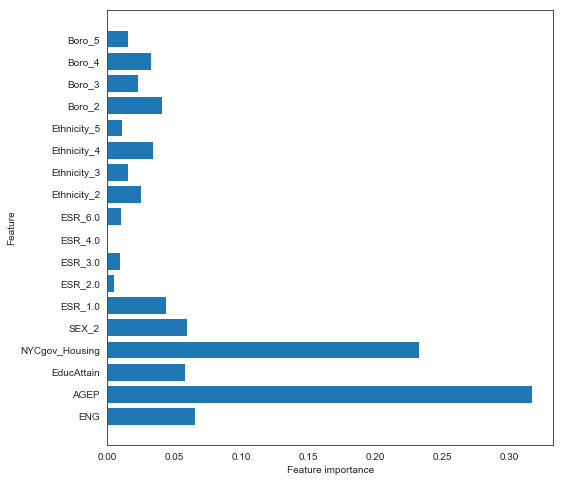

In [274]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

In [276]:
#model performance
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 1874  4077]
 [ 4436 23660]]
             precision    recall  f1-score   support

          0       0.30      0.31      0.31      5951
          1       0.85      0.84      0.85     28096

avg / total       0.76      0.75      0.75     34047



In [278]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 75.0%


In [283]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [285]:
#check accuracy
bagged_tree.score(X_train, y_train)

0.8191323758334068

In [287]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [289]:
#Now, let's check the training and testing accuracy of the model using its .score() method.
forest.score(X_train, y_train)

0.8191323758334068

In [290]:
forest.score(X_test, y_test)

0.8252122066555057

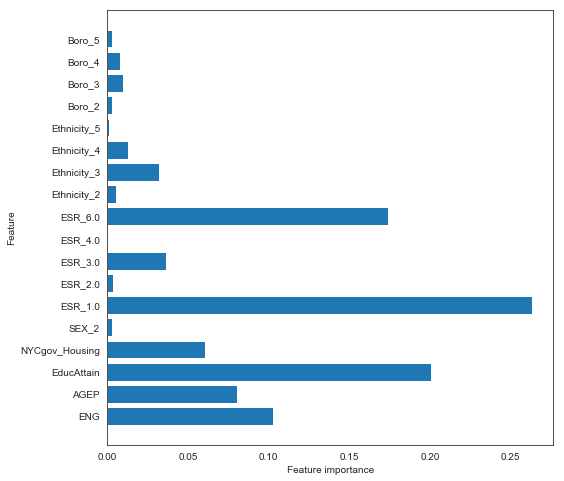

In [291]:
# checking feature importances
plot_feature_importances(forest)

In [292]:
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [220]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.5, random_state=0)
print(target.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) # fitting ONLY on training data
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64
1    28036
0    28036
dtype: int64


In [221]:
# Train the classifier using training data 
dtr = DecisionTreeClassifier(criterion='entropy')
dtr.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [222]:
# Make predictions using test set 
y_pred = dtr.predict(X_test)
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8439904086181619

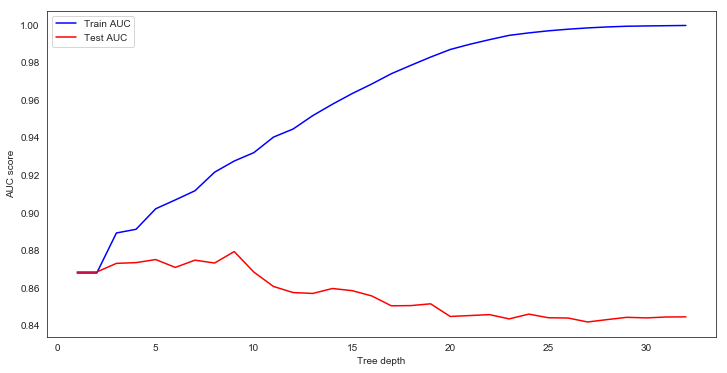

In [223]:
'''Maximum Tree Depth: Let's first check for the best depth parameter for our decision tree.
1 Create an array for for depth values ranging from 1 - 32.
2 In a loop, train the classifier for each depth value (32 runs)
3 Calculate the training and test AUC for each run
4 Plot a graph to show under/over fitting and optimal value
5 Interpret the results
'''
# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

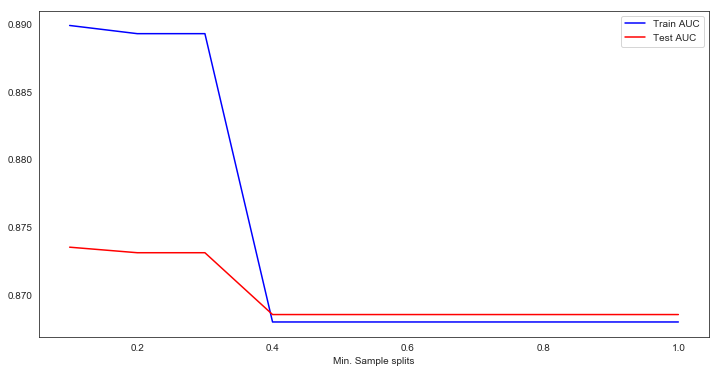

In [228]:
'''
Minimum Sample Split: Now check for the best min_samples_splits parameter for our decision tree.
Create an array for for min_sample_splits values ranging from 0.1 - 1 with an increment of 0.1
In a loop, train the classifier for each min_samples_splits value (10 runs)
Calculate the training and test AUC for each run
Plot a graph to show under/over fitting and optimal value
Interpret the results'''
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

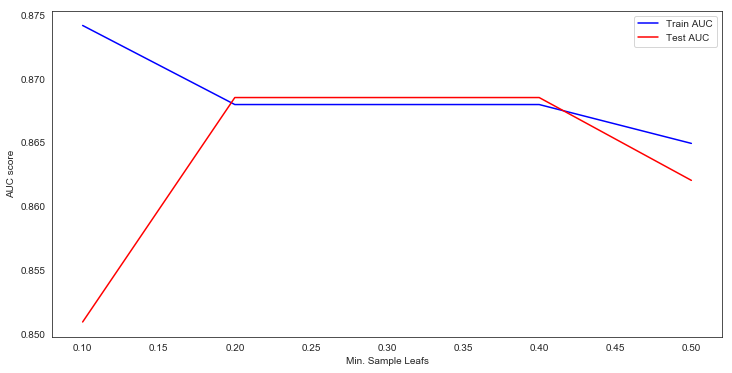

In [229]:
'''Minimum Sample Leafs: Now check for the best min_samples_leafs parameter value for our decision tree.
Create an array for for min_samples_leafs values ranging from 0.1 - 0.5 with an increment of 0.1
In a loop, train the classifier for each min_samples_leafs value (5 runs)
Calculate the training and test AUC for each run
Plot a graph to show under/over fitting and optimal value
Interpret the results'''
# Calculate the optimal value for minimum sample leafs

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

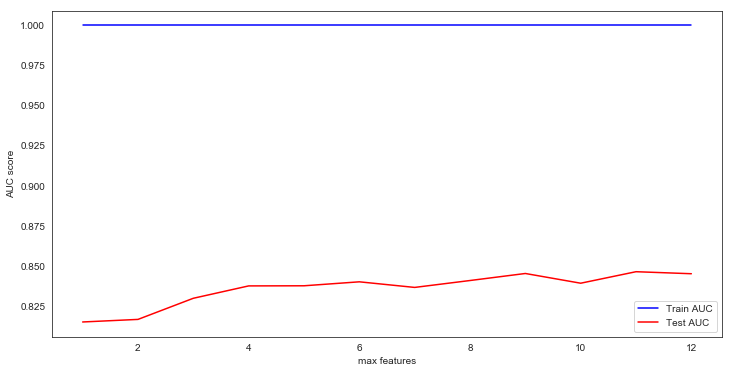

In [233]:
'''Maximum Features: Now check for the best max_features parameter value for our decision tree.
Create an array for for max_features values ranging from 1 - 12 (1 features vs all)
In a loop, train the classifier for each max_features value (12 runs)
Calculate the training and test AUC for each run
Plot a graph to show under/over fitting and optimal value
Interpret the results'''
# Find the best value for optimal maximum feature size
max_features = list(range(1,X_train_resampled.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
   dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature)
   dt.fit(X_train_resampled, y_train_resampled)
   train_pred = dt.predict(X_train_resampled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_resampled, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show() 

In [237]:
'''Re-train the classifier with chosen values:
So now we shall use the best values from each training phase above and 
feed it back to our classifier and see if have any improvement in predictive performance.
Train the classifier with optimal values identified
compare the AUC with vanilla DT AUC
Interpret the results of comparison'''
# train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth=2,
                           min_samples_split=0.4,
                           min_samples_leaf=0.25)
dt.fit(X_train_resampled, y_train_resampled)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.845430517030968

In [ ]:
# You observations here 
# we moved from AUC 0.69 in the vanilla classifier to 0.73 some tuning. 
# Due to randomness, results may slightly differ, there is some improvement in most cases. 
# With more complicated datasets, we might see an even bigger improvement in AUC/accuracy of the classifier. 

In [42]:
chosen_catcols = ['CIT','SEX','ESR','DIS','Ethnicity','Boro']

In [43]:
data[chosen_catcols] = data[chosen_catcols].astype(np.str)

In [45]:
chosen_cols6 = ['TotalWorkHrs_PU', 'NYCgov_Income','NYCgov_Threshold','ENG', \
                'AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', 
                'EducAttain', 'NYCgov_Housing', 'NYCgov_PovGapIndex']
len(chosen_cols6)

14

In [51]:
chosen_cols5 = ['TotalWorkHrs_PU', 'ENG','AGEP','CIT', 'SEX', 'ESR', 'DIS', 'Ethnicity', 'Boro', 
                'EducAttain', 'NYCgov_Housing']
len(chosen_cols5)

11

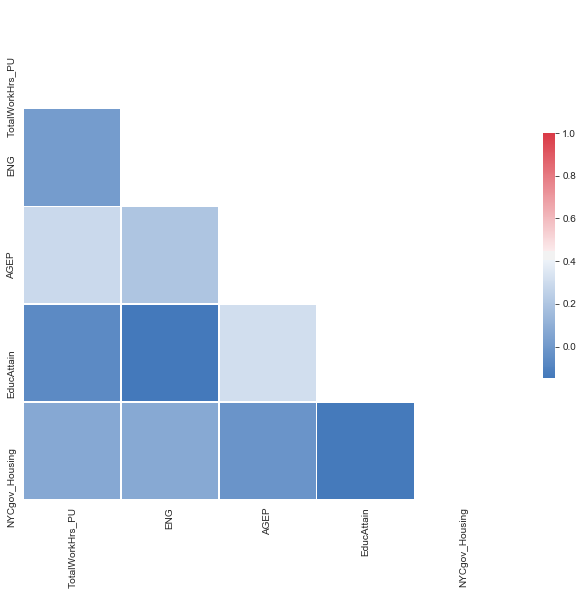

In [52]:
CorrMtx(data[chosen_cols5].corr(), dropDuplicates = True)

In [53]:
data[chosen_cols5].corr()

,TotalWorkHrs_PU,ENG,AGEP,EducAttain,NYCgov_Housing
TotalWorkHrs_PU,1.000000,0.016304,0.291417,-0.062570,0.074278
ENG,0.016304,1.000000,0.201106,-0.144823,0.075495
AGEP,0.291417,0.201106,1.000000,0.314695,-0.019116
EducAttain,-0.062570,-0.144823,0.314695,1.000000,-0.138275
NYCgov_Housing,0.074278,0.075495,-0.019116,-0.138275,1.000000


In [54]:
# normalize
data.loc[:, float_cols] = float_data.apply(lambda x: (x-x.min())/(x.max()-x.min()),axis=0)

In [55]:
data.loc[:, float_cols].sample(10)

,WAGP_adj,INTP_adj,SEMP_adj,SSP_adj,SSIP_adj,PA_adj,RETP_adj,OI_adj,MRGP_adj,RNTP_adj,...,NYCgov_MedPremiums,NYCgov_WIC,NYCgov_SNAP,NYCgov_SchoolLunch,NYCgov_SchoolBreakfast,NYCgov_Nutrition,NYCgov_FICAtax,NYCgov_IncomeTax,NYCgov_PovGap,NYCgov_PovGapIndex
2787,0.000000,0.004237,0.014152,0.408,0.0,0.0,0.0,0.261538,0.000000,0.000000,...,0.128265,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.021135,0.000000,0.000000
16996,0.141066,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.396825,0.000000,...,0.234772,0.0,0.000000,0.0,0.0,0.000000,0.071792,0.041968,0.000000,0.000000
24698,0.000000,0.004237,0.134085,0.000,0.0,0.0,0.0,0.000000,0.460317,0.000000,...,0.170331,0.0,0.000000,0.0,0.0,0.000000,0.108823,0.047296,0.000000,0.000000
44484,0.031348,0.004298,0.038139,0.220,0.0,0.0,0.0,0.000000,0.000000,0.394737,...,0.025601,0.0,0.000000,0.0,0.0,0.000000,0.026060,0.023741,0.000000,0.000000
52872,0.064263,0.004237,0.014152,0.240,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.127905,0.0,0.000000,0.0,0.0,0.000000,0.025158,0.028347,0.000000,0.000000
45801,0.125392,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.000000,0.289474,...,0.009123,0.0,0.000000,0.0,0.0,0.000000,0.049089,0.041835,0.000000,0.000000
15057,0.000000,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.000000,0.447368,...,0.122539,0.0,0.207361,0.0,0.0,0.183164,0.030940,0.016525,0.160323,0.275455
8632,0.000000,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.634921,0.000000,...,0.326444,0.0,0.000000,0.0,0.0,0.000000,0.184082,0.115368,0.000000,0.000000
34126,0.188088,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.000000,0.500000,...,0.013415,0.0,0.000000,0.0,0.0,0.000000,0.073633,0.057221,0.000000,0.000000
54901,0.070533,0.004237,0.014152,0.000,0.0,0.0,0.0,0.000000,0.222222,0.000000,...,0.098121,0.0,0.000000,0.0,0.0,0.000000,0.067804,0.033867,0.000000,0.000000


In [56]:
X = pd.get_dummies(data[chosen_cols5], drop_first=True, dtype=float)
X.columns

Index(['TotalWorkHrs_PU', 'ENG', 'AGEP', 'EducAttain', 'NYCgov_Housing',
       'CIT_2', 'CIT_3', 'CIT_4', 'CIT_5', 'SEX_2', 'ESR_1.0', 'ESR_2.0',
       'ESR_3.0', 'ESR_4.0', 'ESR_6.0', 'DIS_2', 'Ethnicity_2', 'Ethnicity_3',
       'Ethnicity_4', 'Ethnicity_5', 'Boro_2', 'Boro_3', 'Boro_4', 'Boro_5'],
      dtype='object')

In [57]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X)

In [58]:
X_pca.shape

(68094, 2)

In [59]:
y = data['NYCgov_Pov_Stat']

X = sm.tools.add_constant(X)

logit_model = sm.Logit(y, X)
result = logit_model.fit() #transparams=False

Optimization terminated successfully.
         Current function value: 0.354466
         Iterations 7


In [60]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        NYCgov_Pov_Stat   No. Observations:                68094
Model:                          Logit   Df Residuals:                    68069
Method:                           MLE   Df Model:                           24
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                  0.2427
Time:                        12:07:19   Log-Likelihood:                -24137.
converged:                       True   LL-Null:                       -31874.
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5280      0.068     51.712      0.000       3.394       3.662
TotalWorkHrs_PU    -0.9745      0.011    -86.261      0.000      -0.997      -0.952
ENG                -0.2303      0.014    -16.750      0.000      -0.257      -0.203
AGEP                0.0309      0.001     38.538      0.000       0.029       0.032
EducAttain          0.2958      0.012     23.875      0.000       0.271       0.320
NYCgov_Housing      2.7238      0.107     25.563      0.000       2.515       2.933
CIT_2               0.1047      0.078      1.348      0.178      -0.047       0.257
CIT_3              -0.1102      0.097     -1.134      0.257      -0.301       0.080
CIT_4              -0.1388      0.036     -3.883      0.000      -0.209      -0.069
CIT_5              -0.4433      0.039    -11.305      0.000      -0.520      -0.366
SEX_2              -0.0313      0.023     -1.341      0.180      -0.077       0.014
ESR_1.0            -0.8919      0.049    -18.207      0.000      -0.988      -0.796
ESR_2.0            -0.9520      0.117     -8.105      0.000      -1.182      -0.722
ESR_3.0            -1.4566      0.067    -21.614      0.000      -1.589      -1.324
ESR_4.0            -2.0188      0.516     -3.914      0.000      -3.030      -1.008
ESR_6.0            -0.9726      0.049    -19.988      0.000      -1.068      -0.877
DIS_2               0.0574      0.036      1.597      0.110      -0.013       0.128
Ethnicity_2        -0.3514      0.035    -10.053      0.000      -0.420      -0.283
Ethnicity_3        -0.7162      0.038    -18.716      0.000      -0.791      -0.641
Ethnicity_4        -0.2055      0.036     -5.715      0.000      -0.276      -0.135
Ethnicity_5        -0.4972      0.069     -7.172      0.000      -0.633      -0.361
Boro_2              0.1469      0.035      4.170      0.000       0.078       0.216
Boro_3              0.4792      0.046     10.345      0.000       0.388       0.570
Boro_4              0.2151      0.037      5.887      0.000       0.143       0.287
Boro_5              0.2018      0.060      3.338      0.001       0.083       0.320
===================================================================================
"""

In [61]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for None: 0.8319365578823353
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for Balanced: 0.8337058091532861
LogisticRegression(C=1000000000000.0, class_weight={1: 2, 0: 1}, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)
AUC for 2 to 1: 0.8321660704758185
LogisticRegression(C=1000000000000.0, class_weight={1: 10, 

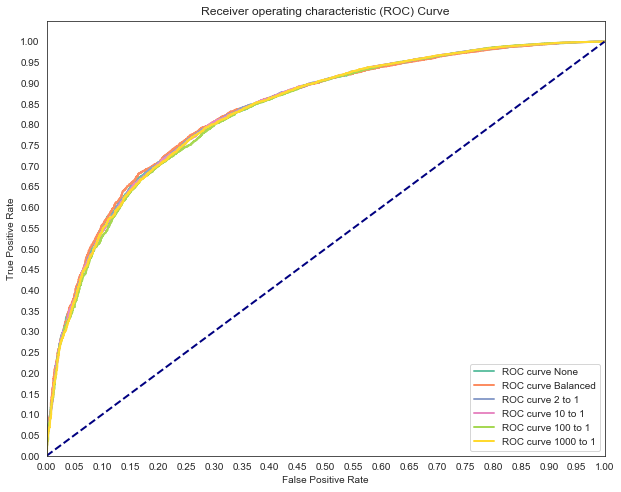

In [88]:
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight,solver='lbfgs') #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [64]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds)))
    print("Recall Score: {}".format(recall_score(test, preds)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds)))
	
# Fitting and training the dummy
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Dummy predictions
dum_pred = dummy.predict(X_test)

#Printing out results
print_metrics(y_test, dum_pred)

Precision Score: 0.8227796052631579
Recall Score: 1.0
Accuracy Score: 0.8227796052631579
F1 Score: 0.9027746447101285


In [75]:
#run thru 25 iterations of k, record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    print(knn.score(X_test, y_test))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

0.7888275375939849
0.745829417293233
0.8202537593984962
0.8067434210526315
0.8323543233082706
0.8290061090225563
0.8385220864661654
0.8361724624060151
0.8415765977443609
0.8401668233082706
0.8426339285714286
0.8417528195488722
0.8438087406015038
0.8432800751879699
0.8458059210526315
0.8448073308270677
0.8448660714285714
0.8459821428571429
0.8468045112781954
0.8474506578947368
0.8462171052631579
0.8462171052631579
0.8467457706766918
0.8463345864661654
0.8461583646616542


Text(0, 0.5, 'Testing Accuracy')

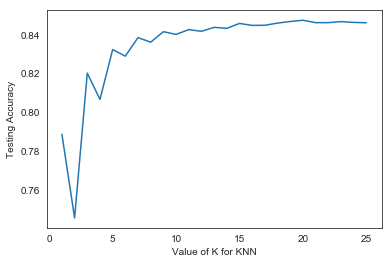

In [74]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [77]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [78]:
cnf_matrix

array([[  751,  2266],
       [  353, 13654]])

In [87]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1,0.25, 0.33, 0.5,0.7,1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, ratio in enumerate(ratios):
    #Fit a model
    smote = SMOTE()
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) #Starter code
    model_knn = knn.fit(X_train_resampled, y_train_resampled)
    print(model_log) #Preview model params

    #Predict
    y_pred = knn.predict(X_test)

    y_score = metrics.accuracy_score(y_test, y_pred)

    fpr, tpr, thresholds = roc_curve(y_pred, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positivex Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


TypeError: Singleton array 0.7601621240601504 cannot be considered a valid collection.

<Figure size 720x576 with 0 Axes>

In [79]:
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64
1    41978
0    41978
dtype: int64


In [84]:
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1,0.25, 0.33, 0.5,0.7,1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, ratio in enumerate(ratios):
    #Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver ='lbfgs') #Starter code
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

TypeError: __init__() got an unexpected keyword argument 'sampling_strategy'

<Figure size 720x576 with 0 Axes>

In [89]:
#run thru 25 iterations of k, record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    print(k, knn.score(X_test, y_test))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 0.7551104323308271
2 0.6907894736842105
3 0.7304981203007519
4 0.6862077067669173
5 0.7160479323308271
6 0.684562969924812
7 0.7110549812030075
8 0.6856790413533834
9 0.7091165413533834
10 0.6870888157894737
11 0.7065319548872181
12 0.6848566729323309
13 0.7061207706766918
14 0.6855028195488722
15 0.7044172932330827
16 0.6863251879699248
17 0.7033599624060151
18 0.689438439849624
19 0.703125
20 0.6888510338345865
21 0.7040061090225563
22 0.6912593984962406
23 0.7037711466165414
24 0.6914356203007519
25 0.7034187030075187


Text(0, 0.5, 'Testing Accuracy')

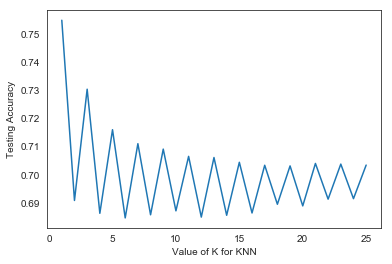

In [90]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [92]:
print_metrics(y_test, y_pred)

Precision Score: 0.9302593659942363
Recall Score: 0.6913686014135789
Accuracy Score: 0.7034187030075187
F1 Score: 0.7932178400294876


In [100]:
#try various n_neighbors
for i in range(2,26):
    knn_cv = KNeighborsClassifier(n_neighbors=20)
    cv_scores = cross_val_score(knn_cv, X, y, cv=i)
    print(cv_scores)

[0.84198778 0.84191976]
[0.84232786 0.84170411 0.84407631]
[0.84123348 0.84368208 0.84368208 0.84368208]
[0.84286658 0.84059035 0.8445554  0.84139805 0.84439712]
[0.84290749 0.84201251 0.84104326 0.84377478 0.8413076  0.84499471]
[0.84251645 0.84148849 0.84200247 0.84457237 0.84138569 0.83984375
 0.84649393]
[0.84459063 0.83916823 0.84269267 0.84234023 0.84480733 0.84314417
 0.84196922 0.84631653]
[0.84445619 0.84035946 0.84392758 0.84273821 0.8445678  0.8397885
 0.84309319 0.84613351 0.84679445]
[0.84508076 0.84317181 0.84214391 0.83803231 0.84096916 0.84711411
 0.84050521 0.84035835 0.84402996 0.84826675]
[0.8468745  0.8442901  0.84057503 0.84057503 0.84461315 0.84348247
 0.84216478 0.84491115 0.84248788 0.84440136 0.84779447]
[0.84760395 0.84370044 0.83823789 0.84599119 0.83753304 0.84138174
 0.84755023 0.83732816 0.84261544 0.84050053 0.84279168 0.8482552 ]
[0.84748998 0.84004581 0.84042756 0.8465356  0.84195457 0.83813705
 0.84459717 0.84514035 0.84284896 0.84132137 0.84552225 0.8

In [109]:
# create another knn model
knn2 = KNeighborsClassifier(p=1)

# create a duct if all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit moxel to data
knn_gscv.fit(X, y)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

{'n_neighbors': 23}
0.843613240520457


In [110]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=0)
print(y.value_counts()) #Previous original class distribution
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) # fitting ONLY on training data
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

1    55985
0    12109
Name: NYCgov_Pov_Stat, dtype: int64
1    23610
0    23610
dtype: int64


In [111]:
#run thru 25 iterations of k, record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    print(k, knn.score(X_test, y_test))
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 0.747702589807853
2 0.6823308270676691
3 0.7180451127819549
4 0.6740810359231412
5 0.7059314954051796
6 0.6707393483709273
7 0.6997702589807853
8 0.6702172096908939
9 0.6958020050125313
10 0.6730367585630743
11 0.6931913116123642
12 0.6730367585630743
13 0.6923558897243107
14 0.674812030075188
15 0.6954887218045113
16 0.6779448621553885
17 0.6969507101086049
18 0.6787802840434419
19 0.6958020050125313
20 0.681077694235589
21 0.6942355889724311
22 0.681704260651629
23 0.6921470342522974
24 0.681077694235589
25 0.6905806182121972


Text(0, 0.5, 'Testing Accuracy')

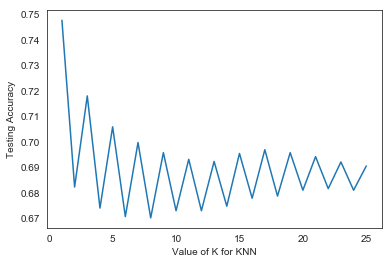

In [112]:
%matplotlib inline

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [108]:
print_metrics(y_test, y_pred)

Precision Score: 0.9283711445322458
Recall Score: 0.6964336934697389
Accuracy Score: 0.7073151629072681
F1 Score: 0.7958481289265227


In [116]:
cnf_matrix2 = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
print(cnf_matrix,'\n',cnf_matrix2)

[[  751  2266]
 [  353 13654]] 
 [[1259  408]
 [2555 5354]]
